In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
s1_file ='/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 1 - Playground/ICA codes/Samples Music/qjano.wav'
s2_file ='/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 1 - Playground/ICA codes/Samples Music/qxime.wav'
s3_file ='/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 1 - Playground/ICA codes/Samples Music/qjp.wav'


In [ ]:
# Importing all the needed libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
from IPython.display import Audio
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler
from scipy.signal import butter, filtfilt

In [ ]:
# Load files
signal1, samp_rate1 = librosa.load(s1_file)
signal2, samp_rate2 = librosa.load(s2_file)
signal3, samp_rate3 = librosa.load(s3_file)

print("Original 1: Jano ")
display(Audio(signal1, rate=samp_rate1))
print("Original 2: Xime")
display(Audio(signal2, rate=samp_rate2))
print("Original 3: JP")
display(Audio(signal3, rate=samp_rate3))

Output hidden; open in https://colab.research.google.com to view.

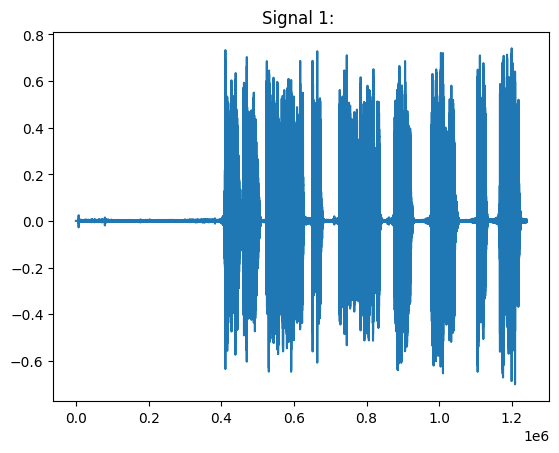

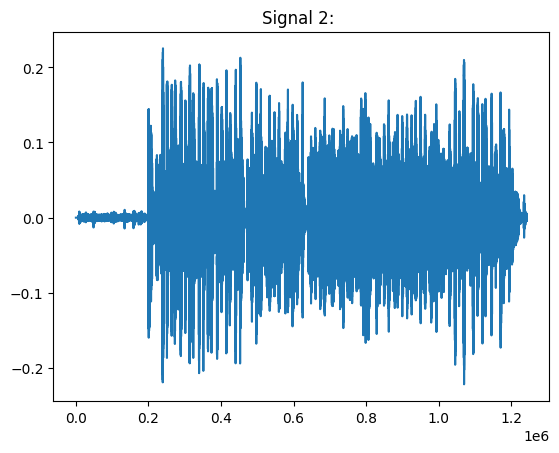

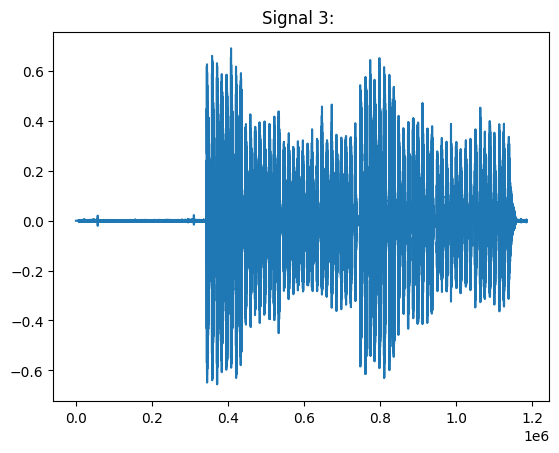

In [ ]:
# Plot the waves
plt.figure()
plt.title("Signal 1: ")
plt.plot(signal1)
plt.show()

plt.figure()
plt.title("Signal 2: ")
plt.plot(signal2)
plt.show()

plt.figure()
plt.title("Signal 3: ")
plt.plot(signal3)
plt.show()

In [ ]:
# Check which one is shorter
length_of_shorter = min(len(signal1), len(signal2), len(signal3))

# Combine the audio files into one matrix (required for FastICA function)
signal_comb = np.vstack([signal1[:length_of_shorter], signal2[:length_of_shorter],signal3[:length_of_shorter]]).T

# Display and play combined audio (average of the two signals)
combined_audio = np.mean(signal_comb, axis=1)

print("Mixed audio: ")
display(Audio(combined_audio, rate=samp_rate1))

plt.figure()
plt.title("Mix")
plt.plot(combined_audio)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Standardize the data before ICA
scaler = StandardScaler()
signal_comb = scaler.fit_transform(signal_comb)

# Use FastICA function to separate the signals into the 2 original sources
ica = FastICA(n_components=3,algorithm="deflation")
separated = ica.fit_transform(signal_comb)

# Extract new sounds
separated_1 = separated[:, 0] / np.max(np.abs(separated[:, 0]))
separated_2 = separated[:, 1] / np.max(np.abs(separated[:, 1]))
separated_3 = separated[:, 2] / np.max(np.abs(separated[:, 2]))

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [ ]:




# Play sounds
print("Separation 1: ")
display(Audio(separated_1, rate=samp_rate1))

plt.figure()
plt.title("Source 1")
plt.plot(separated_1)
plt.show()

print("Separation 2: ")
display(Audio(separated_2, rate=samp_rate2))

plt.figure()
plt.title("Source 2")
plt.plot(separated_2)
plt.show()

print("Separation 3: ")
display(Audio(separated_3, rate=samp_rate3))

plt.figure()
plt.title("Source 3")
plt.plot(separated_3)
plt.show()




Output hidden; open in https://colab.research.google.com to view.

In [ ]:


# Directory where your audio files are located
folder_path = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 1 - Playground/ICA codes/Samples Music/'
file_names = os.listdir(folder_path)

# Initialize lists to hold signals and sampling rates
signals = []
samp_rates = []

# Load files
for file_name in file_names:
    signal, samp_rate = librosa.load(os.path.join(folder_path, file_name))
    signals.append(signal)
    samp_rates.append(samp_rate)

# Display and plot original signals
plt.figure(figsize=(15, 10))
for i, (signal, samp_rate) in enumerate(zip(signals, samp_rates)):
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns, index i+1
    plt.title(f"Original Signal {i+1}")
    plt.plot(signal)
    display(Audio(signal, rate=samp_rate))

plt.tight_layout()
plt.show()

# Find the shortest signal length
length_of_shorter = min(len(s) for s in signals)

# Combine the audio files into one matrix (required for FastICA function)
signal_comb = np.vstack([s[:length_of_shorter] for s in signals]).T

# Standardize the data before ICA
scaler = StandardScaler()
signal_comb = scaler.fit_transform(signal_comb)

# Use FastICA function to separate the signals
ica = FastICA(n_components=len(signals), algorithm="deflation")
separated = ica.fit_transform(signal_comb)

# Extract new sounds and plot them
plt.figure(figsize=(15, 10))
for i in range(separated.shape[1]):
    separated_i = separated[:, i] / np.max(np.abs(separated[:, i]))
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns, index i+1
    plt.title(f"Separated Signal {i+1}")
    plt.plot(separated_i)
    display(Audio(separated_i, rate=samp_rates[0]))  # Assuming all sampling rates are the same

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# ... (previous code remains unchanged)

# Combine the audio files into one matrix (required for FastICA function)
signal_comb = np.vstack([s[:length_of_shorter] for s in signals]).T

# Create and display mixed (average) audio and plot it
combined_audio = np.mean(signal_comb, axis=1)
print("Mixed audio:")
display(Audio(combined_audio, rate=samp_rates[0]))  # Assuming all sampling rates are the same

plt.figure()
plt.title("Mixed Audio")
plt.plot(combined_audio)
plt.show()

# Standardize the data before ICA
# ... (rest of the code remains unchanged)


Output hidden; open in https://colab.research.google.com to view.